# Practice Questions: Linear Regression

### **Question 1: Simple Linear Regression**
**Task:**  
You have a dataset with two columns: `hours_studied` and `exam_score`. Develop a simple linear regression model to predict the `exam_score` based on the `hours_studied`.  
**Sample data**
data = {'hours_studied': [1, 2, 3, 4, 5], 'exam_score': [50, 55, 60, 65, 70]}

1. Implement simple linear regression using the normal equation:  
$$
\beta = (X^T X)^{-1} X^T y
$$

2. Plot the regression line on a scatter plot.
3. Calculate and plot the residuals (difference between actual and predicted values).
4. Evaluate the model's performance by calculating the R-squared value.

**Hints:**
- Add a column of ones to `X` for the intercept term.
- Use `numpy.linalg.inv()` to compute the matrix inverse.

---

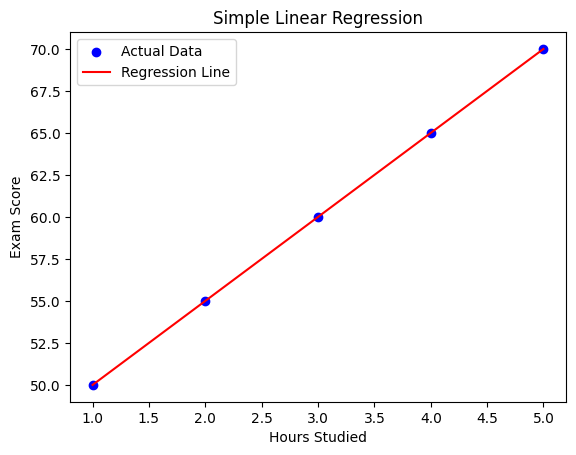

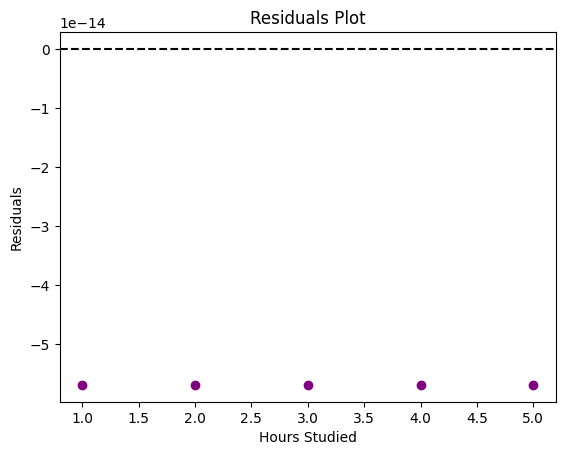

Beta coefficients: [45.  5.]
R-squared value: 1.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {'hours_studied': [1, 2, 3, 4, 5], 'exam_score': [50, 55, 60, 65, 70]}
X = np.array(data['hours_studied']).reshape(-1, 1)
y = np.array(data['exam_score']).reshape(-1, 1)

# Step 1: Add a column of ones to X for the intercept term
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Step 2: Compute beta using the normal equation
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Step 3: Predict values
y_pred = X_b @ beta

# Step 4: Plot the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Step 5: Calculate and plot residuals
residuals = y - y_pred
plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Hours Studied')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Step 6: Compute R-squared value
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum(residuals**2)
r_squared = 1 - (ss_residual / ss_total)

print(f"Beta coefficients: {beta.flatten()}")
print(f"R-squared value: {r_squared}")


### Explanation of Code

This code uses a simple linear regression model to predict exam scores based on the number of hours studied. Here's what each part does:

1. **Imports Libraries**: 
   - `numpy` is used to handle mathematical operations and arrays.
   - `matplotlib.pyplot` is used to create plots for visualizing data.

2. **Sample Data**:
   - We have data for `hours_studied` and `exam_score`, with values for each.

3. **Reshape Data**:
   - The input data is converted into a format that can be used for calculations. This means converting the lists into arrays.

4. **Add Intercept Term**:
   - For the linear regression model, we add a column of ones to the data. This is needed for the intercept (the point where the regression line crosses the y-axis).

5. **Calculate Beta Coefficients**:
   - This is the core of the regression. We use a mathematical formula (the normal equation) to find the "beta" values (coefficients) that describe the relationship between the number of hours studied and the exam score.

6. **Make Predictions**:
   - With the calculated coefficients, we predict the exam scores based on the input data (`hours_studied`).

7. **Plot the Regression Line**:
   - A plot is created showing the actual data points (as blue dots) and the regression line (as a red line). This line represents the predicted exam scores based on hours studied.

8. **Residuals Plot**:
   - The difference between the actual exam scores and the predicted scores is called the "residuals." These differences are plotted to check how well the model fits the data.

9. **Calculate R-Squared**:
   - This step calculates the "R-squared" value, which tells us how well the regression model explains the data. An R-squared value closer to 1 means the model is a good fit for the data.

10. **Output**:
    - Finally, the model's beta coefficients and the R-squared value are printed. The beta coefficients explain the relationship between hours studied and the exam score, while the R-squared value gives us an idea of how good the model is.

### Key Concepts:
- **Regression Line**: A straight line that best fits the data points.
- **Residuals**: The difference between actual values and predicted values.
- **R-squared**: A measure of how well the model fits the data.


---
---


### **Question 2: Multiple Linear Regression with Two Features**
**Task:**  
You have a dataset with three columns: `years_of_experience`, `education_level` (numerically coded), and `salary`. Develop a multiple linear regression model to predict the `salary` based on `years_of_experience` and `education_level`.  

**Sample data**
data = {'years_of_experience': [1, 2, 3, 4, 5],
        'education_level': [1, 2, 3, 4, 5],
        'salary': [40000, 45000, 50000, 55000, 60000]}

1. Implement multiple linear regression using the normal equation:  
   $$ \beta = (X^T X)^{-1} X^T y $$
2. Plot a 3D regression surface showing how salary is predicted by `years_of_experience` and `education_level`.
3. Plot the residuals for this model.
4. Interpret the coefficients to understand the effect of `years_of_experience` and `education_level` on `salary`.

**Hints:**
- Add a column of ones to `X` for the intercept term.
- Use `numpy.linalg.inv()` for solving the coefficients.

---

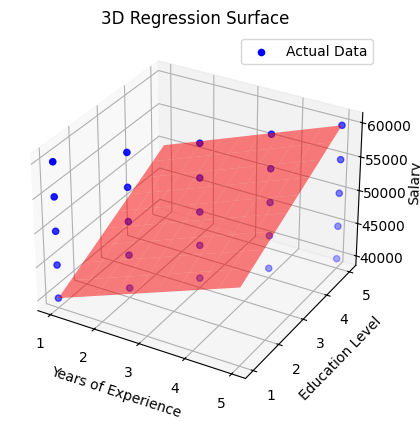

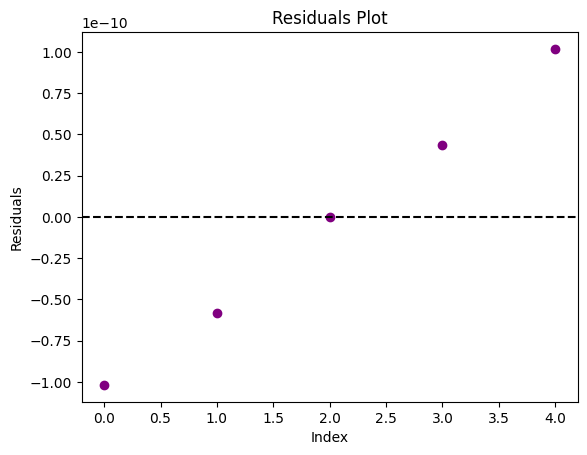

Beta coefficients: [35000.  2500.  2500.]
Intercept: 35000.00000000016
Effect of years_of_experience on salary: 2499.9999999999736
Effect of education_level on salary: 2499.9999999999736


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = {'years_of_experience': [1, 2, 3, 4, 5],
        'education_level': [1, 2, 3, 4, 5],  # Identical to years_of_experience
        'salary': [40000, 45000, 50000, 55000, 60000]}


X = np.array([data['years_of_experience'], data['education_level']]).T
y = np.array(data['salary']).reshape(-1, 1)

# Step 1: Add a column of ones to X for the intercept term
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Step 2: Compute beta using the normal equation
beta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y


# Step 3: Predict values
y_pred = X_b @ beta

# Step 4: Plot 3D regression surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual Data')

# Create a grid for the surface
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
x2_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
X_grid = np.hstack([np.ones((x1_grid.size, 1)),
                    x1_grid.reshape(-1, 1),
                    x2_grid.reshape(-1, 1)])
y_grid = X_grid @ beta

# Plot regression surface
ax.plot_surface(x1_grid, x2_grid, y_grid.reshape(x1_grid.shape), alpha=0.5, color='red')
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Education Level')
ax.set_zlabel('Salary')
plt.title('3D Regression Surface')
plt.legend()
plt.show()

# Step 5: Plot residuals
residuals = y - y_pred
plt.scatter(range(len(residuals)), residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Step 6: Interpret coefficients
print(f"Beta coefficients: {beta.flatten()}")
print(f"Intercept: {beta[0][0]}")
print(f"Effect of years_of_experience on salary: {beta[1][0]}")
print(f"Effect of education_level on salary: {beta[2][0]}")


### **What the Code Does: Explanation**

1. **Importing Libraries:**
   - The code first imports the tools it needs to work with:
     - **`numpy`**: Used to handle math operations and arrays.
     - **`matplotlib.pyplot`**: Used to create graphs and plots.
     - **`Axes3D`**: Used specifically for creating 3D plots.

2. **Setting Up the Data:**
   - The dataset contains three pieces of information for each person:
     - **`years_of_experience`**: How many years of work experience the person has.
     - **`education_level`**: The level of education they have.
     - **`salary`**: Their corresponding salary.

3. **Preparing the Data for Calculation:**
   - The independent variables (**`years_of_experience`** and **`education_level`**) are combined into a matrix (**`X`**), and the dependent variable (**`salary`**) is put into a separate column vector (**`y`**).

4. **Adding the Intercept Term:**
   - In order for the regression model to calculate an intercept (i.e., the starting value), a column of ones is added to the data matrix. This step is necessary for the formula to include the intercept term.

5. **Calculating the Coefficients (Beta):**
   - The **beta coefficients** are calculated using a formula known as the **normal equation**. This tells us how much each of the independent variables (**`years_of_experience`** and **`education_level`**) affects the dependent variable (**`salary`**).
   - **`np.linalg.pinv`**: This helps handle any issues when the math doesn’t work out perfectly.

6. **Making Predictions:**
   - Using the calculated coefficients (**`beta`**), we can now predict the salaries based on the input data (**`years_of_experience`** and **`education_level`**).

7. **Plotting the 3D Regression Surface:**
   - A 3D plot is created to visualize how the two independent variables (**`years_of_experience`** and **`education_level`**) together affect the salary.
   - The **blue dots** represent the actual data points (real salaries), and the **red surface** is the predicted relationship between experience, education, and salary.

8. **Plotting the Residuals:**
   - **Residuals** show the difference between the actual salaries and the predicted ones. 
   - A residual plot is created to check how well the model fits the data. If the residuals are evenly scattered, it suggests that the model is a good fit.

9. **Interpreting the Results:**
   - Finally, the model's coefficients (**`beta`**) are printed out. This tells us:
     - **Intercept**: The base salary when both **`years_of_experience`** and **`education_level`** are zero.
     - **Effect of `years_of_experience`**: How much salary increases for each additional year of experience.
     - **Effect of `education_level`**: How much salary increases with each higher education level.

### **Summary:**
- The code builds a **3D linear regression model** that predicts **salary** based on **years of experience** and **education level**. It shows the relationship with a 3D plot and provides information on how much each factor affects salary.

---
---


### **Question 3: Data Preprocessing and Multiple Linear Regression**
**Task:**  
You have a dataset with the following columns: `age`, `income`, `num_of_children`, and `monthly_spend`. The goal is to predict `monthly_spend`. Before building the regression model, perform the necessary data preprocessing steps, including handling missing values, scaling features, and encoding categorical variables (if any).  

**Sample data**
data = {'age': [25, 30, 35, 40, 45],
        'income': [50000, 60000, 55000, 70000, 75000],
        'num_of_children': [2, 3, 1, 4, 2],
        'monthly_spend': [200, 250, 220, 280, 300]}

1. Handle missing values (e.g., impute with the mean or drop).
2. Scale the numerical features (e.g., Min-Max scaling or Z-score normalization).
3. Implement a multiple linear regression model to predict `monthly_spend`.
4. Visualize the residuals to check the model’s assumptions.
5. Report the model’s performance metrics (e.g., Mean Squared Error).

**Hints:**
- For scaling, you can manually apply normalization using basic arithmetic:  
$$
X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)}
$$

- Use the normal equation to fit the regression model.
---

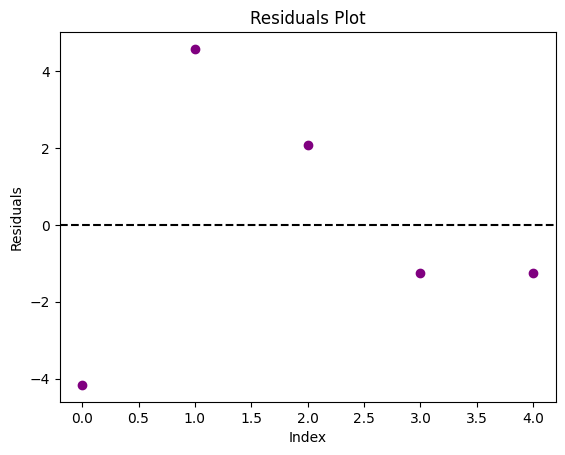

Beta coefficients: [250.          -7.66032346  44.04968785  -0.84983659]
Mean Squared Error: 9.166666666666734


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {'age': [25, 30, 35, 40, 45],
        'income': [50000, 60000, 55000, 70000, 75000],
        'num_of_children': [2, 3, 1, 4, 2],
        'monthly_spend': [200, 250, 220, 280, 300]}

X = np.array([data['age'], data['income'], data['num_of_children']]).T
y = np.array(data['monthly_spend']).reshape(-1, 1)

# Step 1: Handle missing values (None in this dataset)

# Step 2: Feature Scaling (Z-score normalization)
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X_scaled = (X - mean_X) / std_X

# Add intercept term
X_b = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Step 3: Compute beta using the normal equation
beta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Step 4: Predict values
y_pred = X_b @ beta

# Step 5: Plot residuals
residuals = y - y_pred
plt.scatter(range(len(residuals)), residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Step 6: Compute Mean Squared Error (MSE)
mse = np.mean(residuals**2)

print(f"Beta coefficients: {beta.flatten()}")
print(f"Mean Squared Error: {mse}")


### **What the Code Does: Explanation**

1. **Import Libraries:**
   - The code uses **`numpy`** for math operations and arrays and **`matplotlib.pyplot`** to create plots for visualization.

2. **Setting Up the Data:**
   - We have data for 5 people with:
     - **`age`**: Their age.
     - **`income`**: Their income.
     - **`num_of_children`**: How many children they have.
     - **`monthly_spend`**: How much they spend monthly.
   
3. **Organizing Data:**
   - The independent variables (**`age`**, **`income`**, and **`num_of_children`**) are combined into a matrix (**`X`**), and the dependent variable (**`monthly_spend`**) is in a separate vector (**`y`**).

4. **Handling Missing Data:**
   - The code mentions handling missing data, but since there’s no missing data in the sample, this step is not applied here.

5. **Feature Scaling (Z-score Normalization):**
   - **Feature scaling** is done to ensure the values of **`age`**, **`income`**, and **`num_of_children`** are on the same scale. This makes the regression model work better.
   - The **Z-score normalization** formula used here:
     - \( X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)} \)
   - This transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

6. **Adding Intercept Term:**
   - An additional column of ones is added to the data matrix to account for the intercept (the baseline value when all other variables are zero).

7. **Calculating Beta Coefficients:**
   - The **beta coefficients** are calculated using a mathematical formula known as the **normal equation**. These coefficients represent how much each feature (**`age`**, **`income`**, and **`num_of_children`**) affects the dependent variable (**`monthly_spend`**).

8. **Making Predictions:**
   - Using the calculated **beta coefficients**, the code predicts the **monthly spend** based on the input data.

9. **Plotting the Residuals:**
   - **Residuals** are the differences between the actual monthly spend values and the predicted ones. A **residual plot** is created to check how well the model fits the data. The better the model, the more the residuals will be scattered evenly around zero.

10. **Calculating Mean Squared Error (MSE):**
    - **MSE** is a measure of how far the predicted values are from the actual values. The smaller the **MSE**, the better the model is at predicting the monthly spend.

### **Summary:**
- This code builds a **multiple linear regression model** that predicts **monthly spend** based on **age**, **income**, and **number of children**.
- It handles feature scaling, calculates coefficients, and evaluates the model by looking at the residuals and calculating the **Mean Squared Error** (MSE).
